# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Nurrizky Arum Jatmiko
- **Email:** nurrizkyaj.core@gmail.com
- **ID Dicoding:** nurrizkyarumjatmiko

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana rata-rata ongkos kirim untuk setiap kota asal penjual di negara bagian Sao Paulo?
- Pertanyaan 2: Apakah ada hubungan antara cicilan pembayaran dengan total pembayaran dalam transaksi yang dilakukan menggunakan kartu kredit?
- Pertanyaan 3: Berapa persen pesanan yang dikirimkan lebih lambat dari tanggal estimasi pengiriman, dan bagaimana skor review yang diberikan pelanggan pada pesanan tersebut?
- Pertanyaan RFM: Bagaimana segmentasi pelanggan berdasarkan Recency, Frequency, dan Monetary value dari transaksi mereka selama satu tahun terakhir, dan segmen mana yang paling potensial untuk ditargetkan promosi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
ordersItems_df = pd.read_csv('data/order_items_dataset.csv')
ordersItems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [3]:
sellers_df = pd.read_csv('data/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [4]:
ordersPayments_df = pd.read_csv('data/order_payments_dataset.csv')
ordersPayments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [5]:
orders_df = pd.read_csv('data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
ordersReviews_df = pd.read_csv('data/order_reviews_dataset.csv')
ordersReviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
customers_df = pd.read_csv('data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- *order_items_dataset.csv* dan *sellers_dataset.csv* digunakan untuk menjawab pertanyaan 1.
- *order_payments_dataset.csv* digunakan untuk menjawab pertanyaan 2.
- *orders_dataset.csv* dan *order_reviews_dataset.csv* digunakan untuk menjawab pertanyaan 3.
- *orders_dataset.csv*, *order_items_dataset.csv* dan *customers_dataset.csv* digunakan untuk menjawab analisis lanjutan (pertanyaan RFM).

### Assessing Data

In [8]:
ordersItems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [9]:
ordersItems_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [10]:
ordersItems_df.duplicated().sum()

np.int64(0)

In [11]:
ordersItems_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [12]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [13]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [14]:
sellers_df.duplicated().sum()

np.int64(0)

In [15]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [16]:
ordersPayments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [17]:
ordersPayments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [18]:
ordersPayments_df.duplicated().sum()

np.int64(0)

In [19]:
ordersPayments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [20]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [21]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [22]:
orders_df.duplicated().sum()

np.int64(0)

In [23]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [24]:
ordersReviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [25]:
ordersReviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [26]:
ordersReviews_df.duplicated().sum()

np.int64(0)

In [27]:
ordersReviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [28]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [29]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [30]:
customers_df.duplicated().sum()

np.int64(0)

In [31]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- *order_df* dan *orderReviews_df* terdapat kesalahan tipe data dan missing values.

### Cleaning Data

In [32]:
orders_df.dropna(axis=0, inplace=True)

In [33]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
 
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [34]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [35]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [36]:
ordersReviews_df.dropna(axis=0, inplace=True)

In [37]:
ordersReviews_df["review_creation_date"] = pd.to_datetime(ordersReviews_df["review_creation_date"])

In [38]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [39]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

**Insight:**
- *order_df* dan *orderReviews_df* telah dibersihkan.

## Exploratory Data Analysis (EDA)

### Explore Pertanyaan 1

In [40]:
merge_df = pd.merge(ordersItems_df, sellers_df, on='seller_id')

In [41]:
spSellers_df = merge_df[merge_df['seller_state'] == 'SP']

In [42]:
avgFreightbyCity_df = spSellers_df.groupby('seller_city')['freight_value'].mean().reset_index()

In [43]:
avgFreightbyCity_df = avgFreightbyCity_df.sort_values(by='freight_value', ascending=False)
avgFreightbyCity_df.head()

,seller_city,freight_value
30,bofete,126.496667
38,caieiras,124.760000
121,londrina,101.700000
214,sao paluo,79.334444
107,jaci,62.118571


### Explore Pertanyaan 2

In [44]:
creditCards_df = ordersPayments_df[ordersPayments_df['payment_type'] == 'credit_card']

In [45]:
creditCards_df[['payment_installments', 'payment_value']].corr()

,payment_installments,payment_value
payment_installments,1.000000,0.376498
payment_value,0.376498,1.000000


### Explore Pertanyaan 3

In [46]:
orders_df['late_delivery'] = orders_df['order_delivered_customer_date'] > orders_df['order_estimated_delivery_date']

In [47]:
latePercentage = orders_df['late_delivery'].mean() * 100
print(f"Persentase pesanan yang terlambat: {latePercentage:.2f}%")

Persentase pesanan yang terlambat: 8.11%


In [48]:
reviews_df = pd.merge(orders_df, ordersReviews_df, on='order_id')

In [49]:
reviews_df = reviews_df.groupby('late_delivery')['review_score'].mean().reset_index()
reviews_df.head()

,late_delivery,review_score
0,False,4.040078
1,True,2.583333


**Insight:**
- Explore Pertanyaan 1: Kota **Bofete** memiliki rata-rata ongkos kirim tertinggi, diikuti oleh **Caieiras**, sementara **Jaci** memiliki rata-rata ongkos kirim terendah di antara kota-kota yang dianalisis.
- Explore Pertanyaan 2: Terdapat korelasi positif yang signifikan antara jumlah cicilan dan total pembayaran, menunjukkan bahwa semakin panjang tenor cicilan yang dipilih konsumen, semakin tinggi nilai transaksi yang mereka lakukan.
- Explore Pertanyaan 3: Pesanan yang terlambat memiliki skor review rata-rata yang lebih rendah dibandingkan pesanan yang tepat waktu, menunjukkan bahwa keterlambatan pengiriman berdampak negatif pada kepuasan pelanggan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\nurri\AppData\Local\Temp\ipykernel_21864\4089862650.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seller_city', y='freight_value', data=avgFreightbyCity_df, palette=colors)


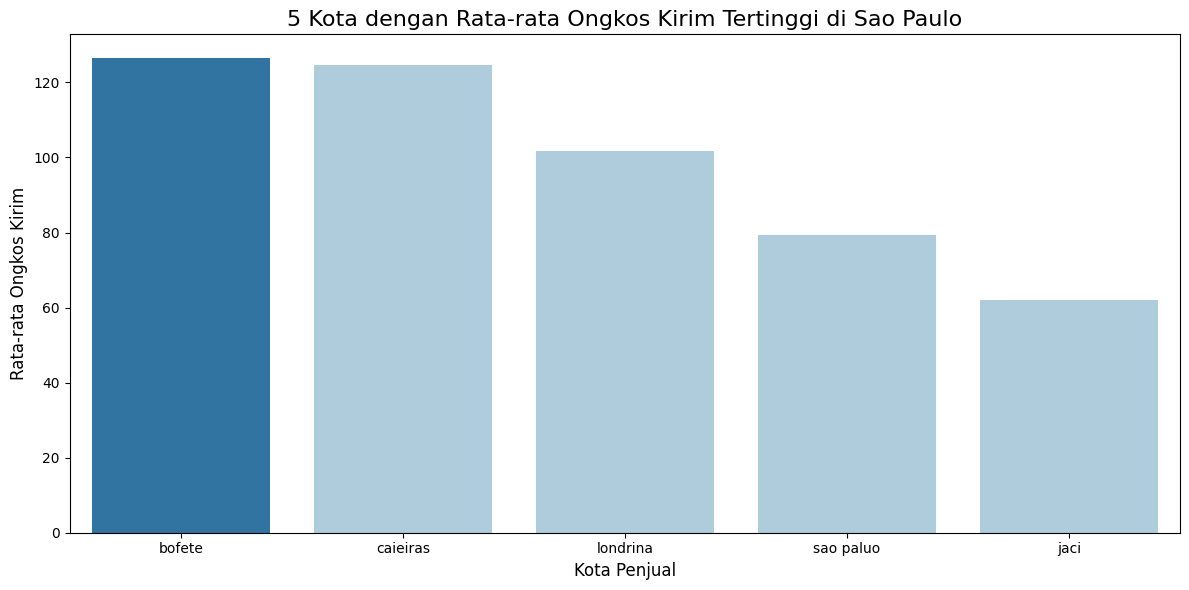

In [50]:
avgFreightbyCity_df = avgFreightbyCity_df.sort_values(by='freight_value', ascending=False).head(5)

colors = ['#1f77b4' if i == 0 else '#a6cee3' for i in range(len(avgFreightbyCity_df))]

plt.figure(figsize=(12,6))

sns.barplot(x='seller_city', y='freight_value', data=avgFreightbyCity_df, palette=colors)

plt.title('5 Kota dengan Rata-rata Ongkos Kirim Tertinggi di Sao Paulo', fontsize=16)

plt.xlabel('Kota Penjual', fontsize=12)
plt.ylabel('Rata-rata Ongkos Kirim', fontsize=12)

plt.tight_layout()
plt.show()

### Pertanyaan 2:

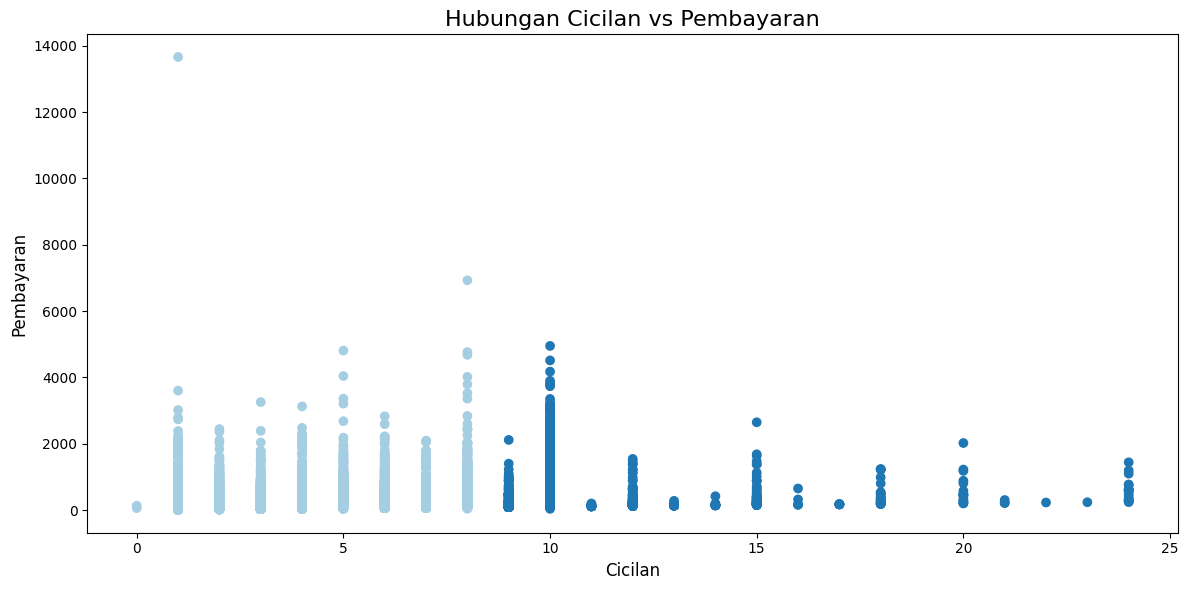

In [51]:
colors = ['#1f77b4' if x > 8 else '#a6cee3' for x in creditCards_df['payment_installments']]

plt.figure(figsize=(12, 6))
plt.scatter(creditCards_df['payment_installments'], creditCards_df['payment_value'], c=colors)

plt.title('Hubungan Cicilan vs Pembayaran', fontsize=16)
plt.xlabel('Cicilan', fontsize=12)
plt.ylabel('Pembayaran', fontsize=12)

plt.tight_layout()
plt.show()

### Pertanyaan 3

C:\Users\nurri\AppData\Local\Temp\ipykernel_21864\755162831.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='late_delivery',y='review_score', data=reviews_df, palette=colors)


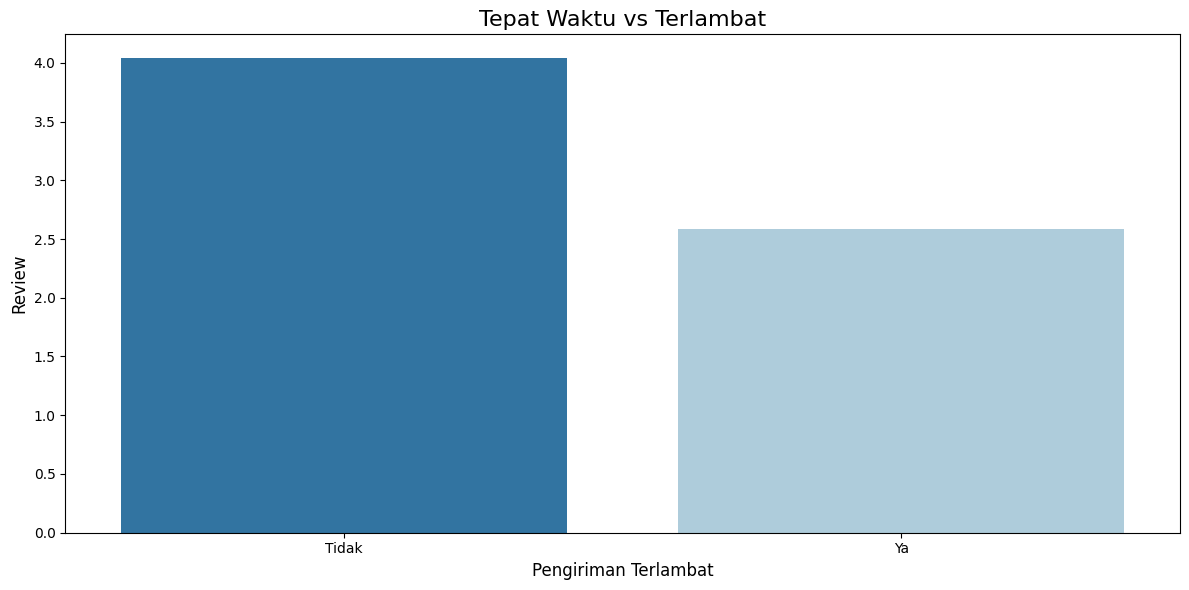

In [52]:
colors = {"False": "#1f77b4", "True":  '#a6cee3'}

plt.figure(figsize=(12, 6))
sns.barplot(x='late_delivery',y='review_score', data=reviews_df, palette=colors)

plt.title('Tepat Waktu vs Terlambat', fontsize=16)
plt.xlabel('Pengiriman Terlambat', fontsize=12)
plt.ylabel('Review', fontsize=12)
plt.xticks([0,1], ['Tidak', 'Ya'])

plt.tight_layout()
plt.show()

**Insight:**
- Pertanyaan 1: Kota Bofete memiliki rata-rata ongkos kirim tertinggi di antara kota-kota lainnya, sementara Jaci mencatatkan ongkos kirim terendah, yang dapat menunjukkan variasi biaya logistik antar lokasi penjual di Sao Paulo.
- Pertanyaan 2: Konsumen yang memilih jumlah cicilan lebih banyak cenderung melakukan pembelian dengan nominal yang lebih besar, mengindikasikan bahwa fasilitas cicilan mendorong konsumen untuk meningkatkan daya belinya.
- Pertanyaan 3: Sekitar 8,11% pesanan terlambat dikirimkan, dan pesanan yang terlambat menerima skor review yang lebih rendah, menandakan bahwa keterlambatan pengiriman berdampak negatif terhadap kepuasan pelanggan.

## Analisis Lanjutan (Opsional)

### Explore RFM

In [53]:
lastYearOrders_df = orders_df[orders_df['order_purchase_timestamp'] >= '2018-01-01']

In [54]:
merge_df = lastYearOrders_df.merge(customers_df, on='customer_id') \
                            .merge(ordersItems_df, on='order_id')

In [55]:
recency = merge_df['order_purchase_timestamp'].max()
rfm_df = merge_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (recency - x.max()).days
}).rename(columns={'order_purchase_timestamp': 'Recency'})

In [56]:
frequency = merge_df.groupby('customer_unique_id')['order_id'].nunique().to_frame('Frequency')
rfm_df = rfm_df.merge(frequency, on='customer_unique_id')

In [57]:
monetary = merge_df.groupby('customer_unique_id')['price'].sum().to_frame('Monetary')
rfm_df = rfm_df.merge(monetary, on='customer_unique_id')

In [58]:
rfm_df['R_score'] = pd.qcut(rfm_df['Recency'], 3, labels=[3, 2, 1])
rfm_df['F_score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 3, labels=[1, 2, 3])
rfm_df['M_score'] = pd.qcut(rfm_df['Monetary'], 3, labels=[1, 2, 3])

In [59]:
rfm_df['RFM_Segment'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str) + rfm_df['M_score'].astype(str)

In [60]:
top_customers = rfm_df[rfm_df['RFM_Segment'] == '333']

**Insight:**
- Explore RFM: Pelanggan dengan segmen RFM *333* adalah pelanggan paling loyal, aktif belanja baru-baru ini, sering membeli, dan mengeluarkan nilai belanja terbesar, sehingga sangat potensial untuk ditargetkan promosi atau program loyalitas.

### Pertanyaan RFM

C:\Users\nurri\AppData\Local\Temp\ipykernel_21864\3664443171.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm_df, x='RFM_Segment', palette=colors)


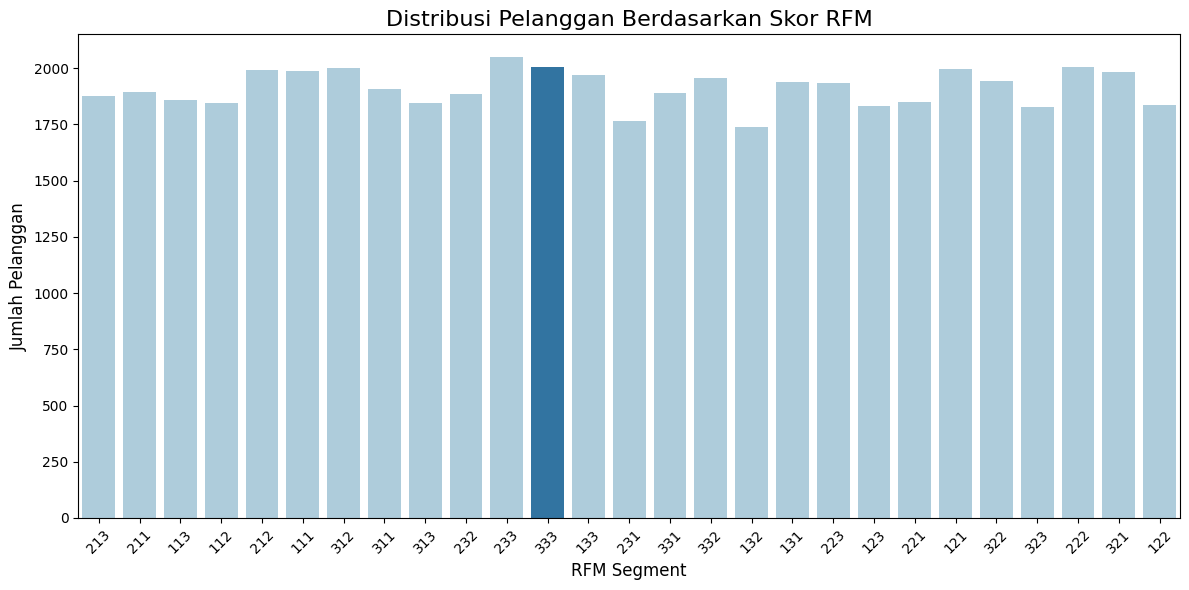

Pelanggan dengan segmen "333" (paling potensial) merupakan 3.89% dari total pelanggan.


In [61]:
colors = {'333': '#1f77b4'}
colors.update({segment: '#a6cee3' for segment in rfm_df['RFM_Segment'].unique() if segment != '333'})

plt.figure(figsize=(12, 6))

sns.countplot(data=rfm_df, x='RFM_Segment', palette=colors)

plt.title('Distribusi Pelanggan Berdasarkan Skor RFM', fontsize=16)
plt.xlabel('RFM Segment', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_customers_count = top_customers.shape[0]
total_customers_count = rfm_df.shape[0]

percentage_top_customers = (top_customers_count / total_customers_count) * 100

print(f'Pelanggan dengan segmen "333" (paling potensial) merupakan {percentage_top_customers:.2f}% dari total pelanggan.')

**Insight:**
- Pertanyaan RFM: Pelanggan dengan segmen *333* yang paling potensial, meskipun hanya *3.89%* dari total pelanggan, menunjukkan nilai tinggi dalam hal frekuensi, nilai transaksi, dan recency, sehingga menjadi target utama untuk promosi atau program loyalitas.

## Conclusion

- Conclution pertanyaan 1: Dengan mengidentifikasi rata-rata ongkos kirim perusahaan dapat mempertimbangkan strategi logistik yang lebih efisien atau penyesuaian harga untuk meningkatkan daya saing dan mengurangi biaya operasional di wilayah tersebut.
- Conclution pertanyaan 2: Korelasi positif antara jumlah cicilan dan total pembayaran membuka peluang strategi bisnis, menyediakan lebih banyak opsi cicilan dapat mendorong peningkatan nilai transaksi dan memperluas jangkauan konsumen, khususnya segmen yang sensitif terhadap pembayaran langsung.
- Conclution pertanyaan 3: Meningkatkan ketepatan waktu pengiriman dapat berkontribusi langsung pada peningkatan kepuasan pelanggan, yang tercermin dalam skor review yang lebih tinggi. Mengoptimalkan logistik dan pengiriman tepat waktu akan berpengaruh besar pada loyalitas pelanggan, yang pada gilirannya dapat mendukung pertumbuhan bisnis melalui rekomendasi positif dan pengulangan transaksi.
- Conclution pertanyaan RFM: Fokus pada pelanggan dengan segmen RFM *333* yang mencakup *3.89%* dari total pelanggan dapat memberikan dampak signifikan, karena mereka adalah pelanggan yang paling loyal, aktif, dan mengeluarkan nilai transaksi tertinggi. Menargetkan mereka dengan promosi khusus atau program loyalitas dapat meningkatkan retensi dan mendorong peningkatan pendapatan secara berkelanjutan.

## Save Dataset

In [62]:
avgFreightbyCity_df.head()

,seller_city,freight_value
30,bofete,126.496667
38,caieiras,124.760000
121,londrina,101.700000
214,sao paluo,79.334444
107,jaci,62.118571


In [63]:
avgFreightbyCity_df.to_csv("dashboard/avg_freight_by_city.csv", index=False)

In [64]:
creditCards_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [65]:
creditCards_df.to_csv("dashboard/credit_cards.csv", index=False)

In [66]:
reviews_df.head()

,late_delivery,review_score
0,False,4.040078
1,True,2.583333


In [67]:
reviews_df.to_csv("dashboard/reviews.csv", index=False)

In [68]:
rfm_df.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Segment
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90,2,1,3,213
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,2,1,1,211
0004bd2a26a76fe21f786e4fbd80607f,145,1,154.00,2,1,3,213
00050ab1314c0e55a6ca13cf7181fecf,131,1,27.99,2,1,1,211
00053a61a98854899e70ed204dd4bafe,182,1,382.00,1,1,3,113


In [69]:
rfm_df.to_csv("dashboard/rfm.csv", index=False)